### load libraries

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import ipywidgets as widgets
from IPython.display import display

### load data

In [28]:
ic_cat = pd.read_csv("IC_cats.csv")
keywords2 = ic_cat.Cat.values.tolist()

In [29]:

recode_project_keywords = pd.read_csv("updated_recode_project_keywords_20240918.csv")

### use keywords to workout the Euclidean distance

In [30]:
df1 = pd.DataFrame([])
index_names = []
max_value = 0.0
for i in range(0,len(recode_project_keywords)):
    keywords1 = recode_project_keywords['keywords (LlaMA3-8B)'][i].replace("\n",",").split(",")
    combined_keywords = keywords1 + keywords2
    # Vectorize the keywords
    vectorizer = TfidfVectorizer().fit(combined_keywords)
    vectors1 = vectorizer.transform(keywords1).toarray()
    vectors2 = vectorizer.transform(keywords2).toarray()

    # Calculate Euclidean distance
    euclidean_dist = euclidean_distances(vectors1, vectors2)

    df = pd.DataFrame(euclidean_dist, index=keywords1, columns=keywords2)
    max_value = max(max_value, df.to_numpy().max())
    # results need to be transposed for later plotting
    df_tmp = pd.DataFrame(df.min()).transpose()
    df1 = pd.concat([df1, df_tmp])
    index_names.append(recode_project_keywords['title'][i])
df1.index = index_names
# normalized df1 values to max_value
df2 = df1/max_value

### plot the radar chart

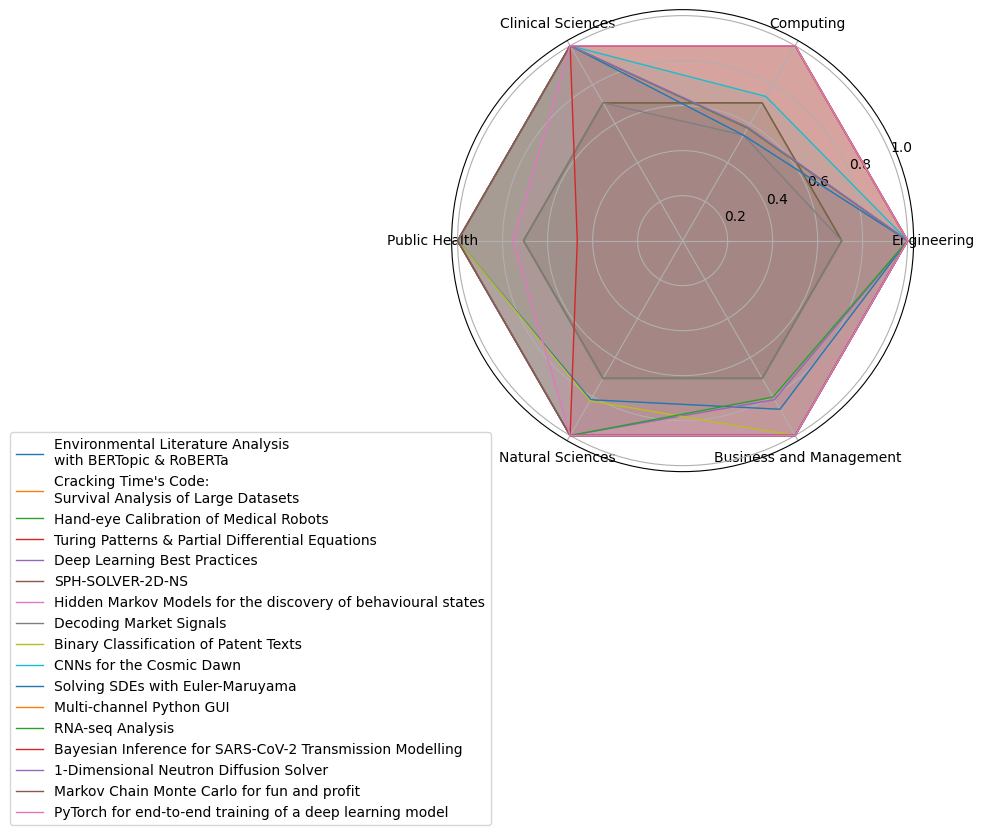

In [31]:
import matplotlib.pyplot as plt
from math import pi
# Function to plot radar chart
def plot_radar_chart(df):
    categories = list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each row
    for i in range(len(df)):
        values = df.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[i])
        ax.fill(angles, values, alpha=0.1)

    # Add labels
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

plot_radar_chart(df2)


### plot the radar chart with widget to allow selecting options among projects

#### radar plot function

In [32]:
def plot_radar_chart_option(selection):
    df = pd.DataFrame(df2.loc[selection]).transpose()
    categories = list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot each row
    for i in range(len(df)):
        values = df.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[i])
        ax.fill(angles, values, alpha=0.1)

    # Add labels
    plt.xticks(angles[:-1], categories)
    plt.legend(loc='right', bbox_to_anchor=(2.1, 0.1))
    plt.show()


#### radar plot with selections

In [33]:
# Creating the dropdown widget, initial value set as NVIDIA to mitigate edge case of initially having no selection
dropdown = widgets.Dropdown(options=index_names, value=index_names[0], description='Select project:')

# Creating interactive functionality for users 
widgets.interactive(plot_radar_chart_option, selection=dropdown)

interactive(children=(Dropdown(description='Select project:', options=('Environmental Literature Analysis\nwit…